#AWS EC2 Price Prediction





##Introduction:
Cloud computing resources are available in a variety of formats, and computer resources are significantly less expensive. Amazon Web Services, a prominent cloud computing provider, offers opportunistic resources like EC2 spot instances, whose pricing fluctuates dynamically dependent on customer demand. We examine spot instance pricing logs and employ a variety of predictive analytics algorithms to evaluate and choose the right algorithm.


##Any changes since the proposal:
There are few changes made in our project from the initial proposal. as initially we had proposed to implement only ARIMA and SARIMA models. Now additionally we thought of adding a few more models which are LSTM, prophet,  Holt–Winters etc so based on the time availability we would implement as many different models as possible.

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Data collection

Reading Data from different data instances files.

In [122]:
df1 = pd.read_csv("/content/drive/MyDrive/Dataset 3 regions/dataset_ g2_2xlarge.csv")

In [123]:
df2 = pd.read_csv("/content/drive/MyDrive/Dataset 3 regions/dataset_c3_2xlarge.csv")

In [124]:
df3 = pd.read_csv("/content/drive/MyDrive/Dataset 3 regions/dataset_i2_2xlarge.csv")

In [125]:
df4 = pd.read_csv("/content/drive/MyDrive/Dataset 3 regions/dataset_m4_2xlarge.csv")

In [126]:
df5 = pd.read_csv("/content/drive/MyDrive/Dataset 3 regions/dataset_r3_2xlarge.csv")

##Data Cleaning



* In the data cleaning process, we concatenated five datasets (df1 to df5) vertically to create a consolidated dataset, dff. To ensure data integrity, we removed any duplicate records present in the consolidated dataset.
* Additionally, we reset the index for better organization. The descriptive statistics generated using describe() provide a summary overview of the cleaned dataset, offering key insights into the central tendency and dispersion of numerical variables.
* These steps are crucial for preparing a clean and structured dataset, laying the foundation for accurate analysis and meaningful visualizations in our AWS EC2 instance price prediction project.








In [127]:
dff = pd.concat([df1,df2,df3,df4,df5], axis=0)

In [128]:
dff.drop_duplicates(inplace=True)

In [129]:
dff = dff.reset_index(drop=True)

In [130]:
dff

,Time,Zone,Instance Type,Product Description,Price
0,2021-06-26 22:13:18+00:00,eu-west-1a,g2.2xlarge,Linux/UNIX,0.2106
1,2021-06-26 22:13:18+00:00,eu-west-1c,g2.2xlarge,Linux/UNIX,0.2106
2,2021-06-26 22:13:18+00:00,eu-west-1b,g2.2xlarge,Linux/UNIX,0.2106
3,2021-06-25 22:13:14+00:00,eu-west-1a,g2.2xlarge,Linux/UNIX,0.2106
4,2021-06-25 22:13:14+00:00,eu-west-1c,g2.2xlarge,Linux/UNIX,0.2106
...,...,...,...,...,...
28837,2021-03-29 17:20:15+00:00,us-west-2c,r3.2xlarge,Linux/UNIX,0.1713
28838,2021-03-29 15:51:38+00:00,us-west-2c,r3.2xlarge,Linux/UNIX,0.1706
28839,2021-03-29 15:51:38+00:00,us-west-2a,r3.2xlarge,Linux/UNIX,0.1577
28840,2021-03-29 15:51:38+00:00,us-west-2b,r3.2xlarge,Linux/UNIX,0.1569


In [131]:
dff.describe()

,Price
count,28842.000000
mean,0.195324
std,0.125385
min,0.077800
25%,0.133300
50%,0.155700
75%,0.189475
max,0.610500


#EDA and Visualizations

##Trends of Price vs Time for different Instances

The visualizations for Price vs Time is useful for understanding the historical price trends over 5 different instances over time. It helps identify patterns, seasonality, or anomalies, aiding in better forecasting and resource planning for AWS EC2 instances. (Sai Ram B)

Text(0.5, 1.0, 'g2_2xlarge')

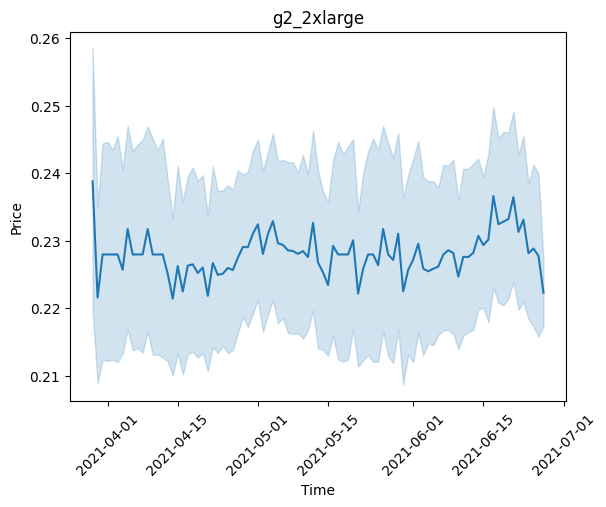

In [132]:
df1["Time"] = pd.to_datetime(df1["Time"]).dt.date
df1.sort_values(by='Time', inplace = True)
sns.lineplot(data=df1, x='Time', y='Price')
plt.xticks(rotation=45)
plt.title("g2_2xlarge")

Text(0.5, 1.0, 'c3_2xlarge')

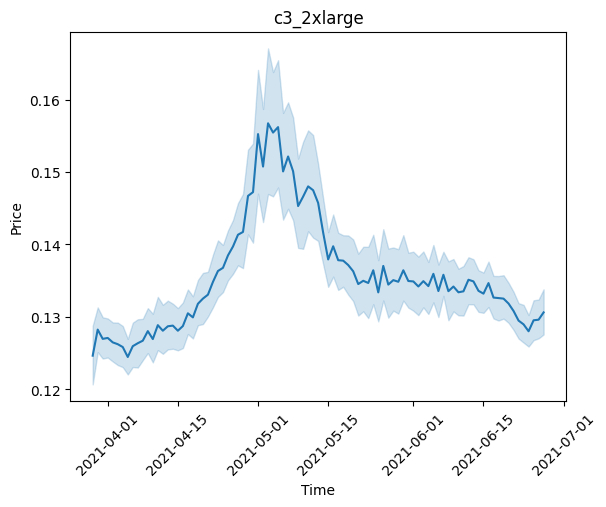

In [133]:
df2["Time"] = pd.to_datetime(df2["Time"]).dt.date
df2.sort_values(by='Time', inplace = True)
sns.lineplot(data=df2, x='Time', y='Price')
plt.xticks(rotation=45)
plt.title("c3_2xlarge")

Text(0.5, 1.0, 'i2_2xlarge')

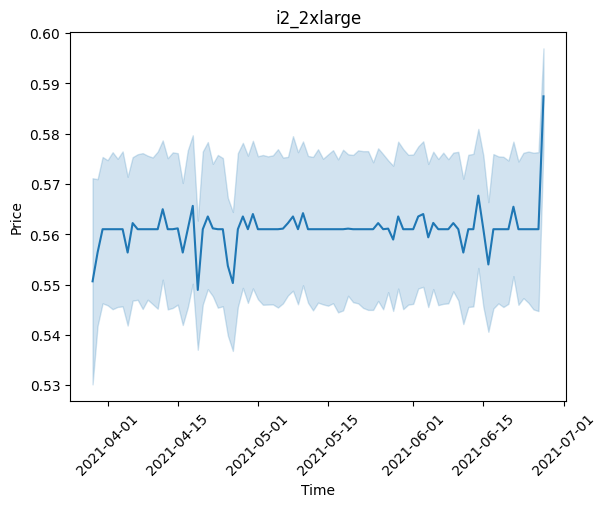

In [134]:
df3["Time"] = pd.to_datetime(df3["Time"]).dt.date
df3.sort_values(by='Time', inplace = True)
sns.lineplot(data=df3, x='Time', y='Price')
plt.xticks(rotation=45)
plt.title("i2_2xlarge")

Text(0.5, 1.0, 'm4_2xlarge')

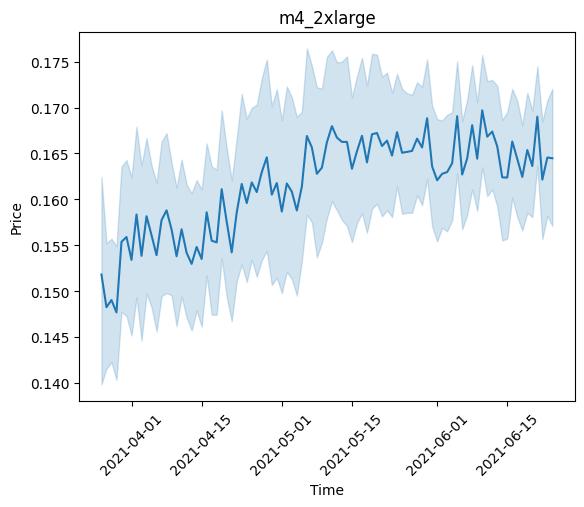

In [135]:
df4["Time"] = pd.to_datetime(df4["Time"]).dt.date
df4.sort_values(by='Time', inplace = True)
sns.lineplot(data=df4, x='Time', y='Price')
plt.xticks(rotation=45)
plt.title("m4_2xlarge")

Text(0.5, 1.0, 'r3_2xlarge')

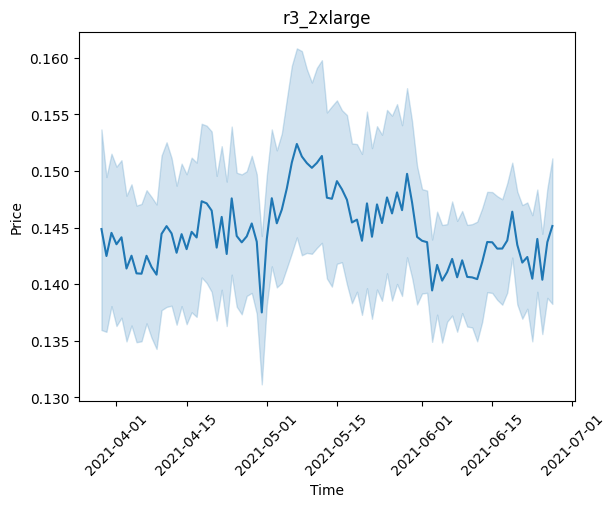

In [136]:
df5["Time"] = pd.to_datetime(df5["Time"]).dt.date
df5.sort_values(by='Time', inplace = True)
sns.lineplot(data=df5, x='Time', y='Price')
plt.xticks(rotation=45)
plt.title("r3_2xlarge")

##Price Variation by Zone
This hypothesis provides insights into how AWS EC2 instance prices vary across different geographic zones. It helps identify regions with cost variations, informing users about potential cost-saving opportunities or zone-specific pricing strategies. (Saaketh Kosaraju)

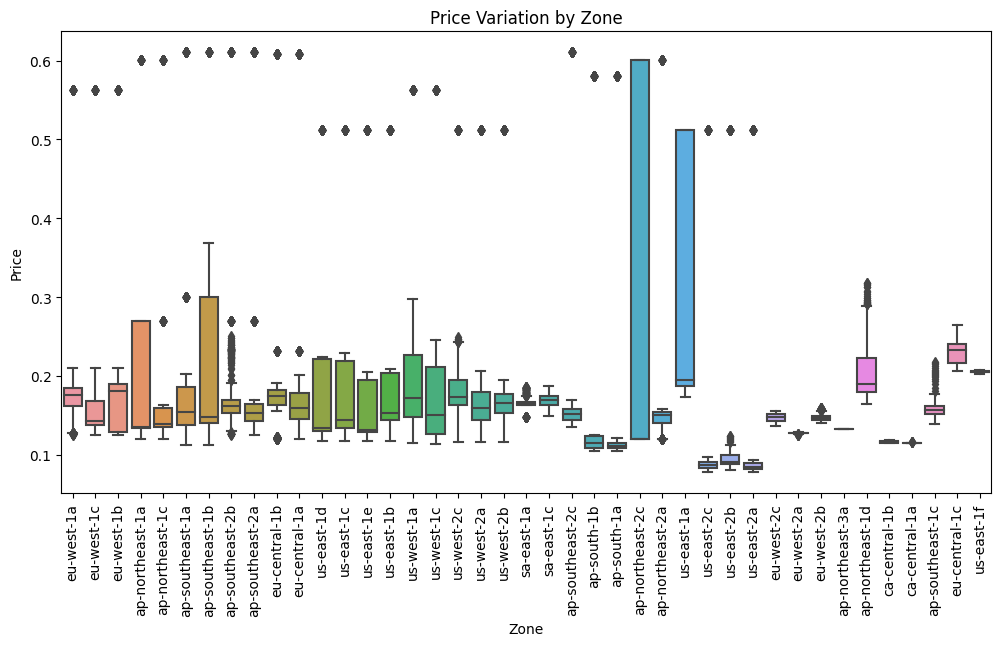

In [137]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Zone', y='Price', data=dff)
plt.title('Price Variation by Zone')
plt.xlabel('Zone')
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.show()

## Zone vs Instance Type counts
The stacked bar plot comparing 'Zone' and 'Instance Type' provides valuable insights into the distribution of AWS EC2 instance types across different geographical zones. This visualization is crucial for understanding the availability and usage patterns of various instance types within each zone. It helps identify potential dependencies between geographic locations and the preferred types of instances, aiding in resource optimization and cost management. (Sai Yasheswini)

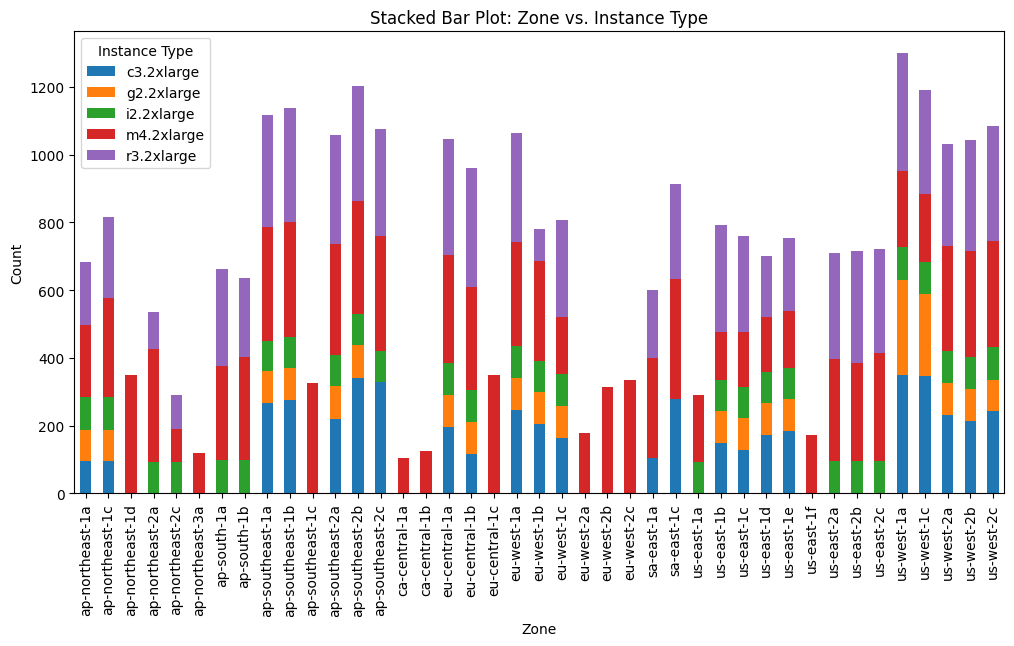

In [138]:
categorical_variable1 = 'Zone'
categorical_variable2 = 'Instance Type'

contingency_table = pd.crosstab(dff[categorical_variable1], dff[categorical_variable2])

contingency_table.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title(f'Stacked Bar Plot: {categorical_variable1} vs. {categorical_variable2}')
plt.xlabel(categorical_variable1)
plt.ylabel('Count')
plt.show()


#Null Hypothesis testing

*   First, we have checked whether the dataset is stationary or not so for that a null hypothesis test is performed on the dataset and if the result of this null hypothesis test on the dataset is greater than 0.05, it indicates a non-stationary dataset and on the other hand, if the result of the null hypothesis test is less than or equal to 0.05, it indicates us that the dataset is stationary
*   To make the data stationary, we computed the differences between consecutive observations known as differencing. This helps us stabilize the mean of the data by removing changes in the level of a time series, and therefore eliminating or reducing the trend and seasonality.
*   Finally, we ensured that  the data is in a format that is suitable for further analysis. (Tej Kodur)


## Checking Stationary



In [ ]:
from statsmodels.tsa.stattools import adfuller

time_series_data = dff["Price"]

result = adfuller(time_series_data)

adf_statistic = result[0]
p_value = result[1]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')

if p_value <= 0.05:
    print("Reject the null hypothesis. The time series is likely stationary.")
else:
    print("Fail to reject the null hypothesis. The time series may not be stationary.")

ADF Statistic: -2.781105167217853
p-value: 0.061023860117712624
Fail to reject the null hypothesis. The time series may not be stationary.


## Making Data Stationary

The data are differenced in an ARIMA model to make it stationary. A model that demonstrates stationarity demonstrates that the data is consistent throughout time. The goal of differencing is to eliminate any patterns or seasonal structures found in most economic and market data.


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
df=dff

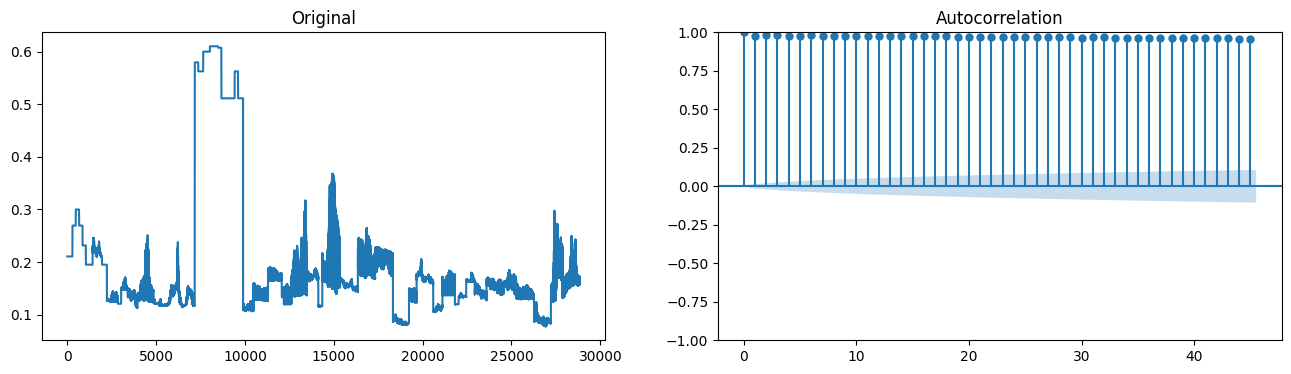

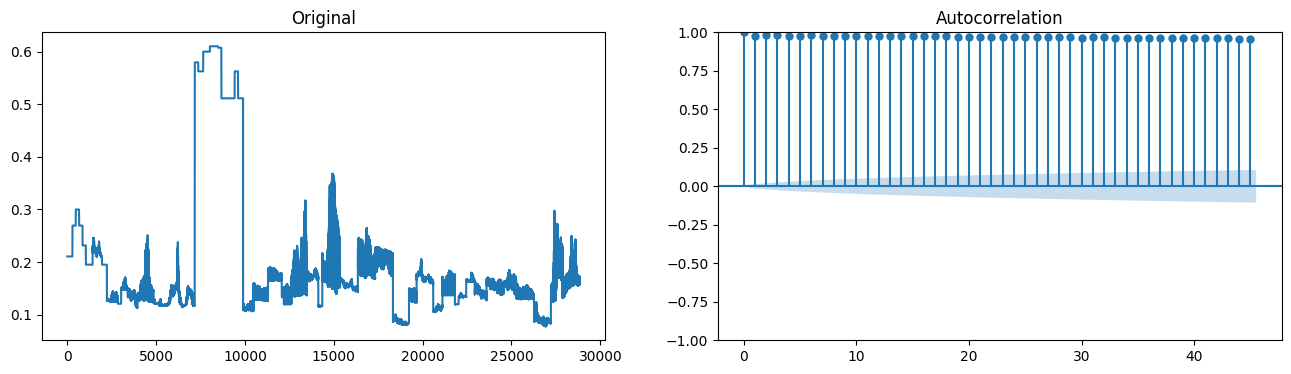

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(df.Price)
ax1.set_title("Original")
plot_acf(df.Price, ax=ax2)

1        0.0000
2        0.0000
3        0.0000
4        0.0000
5        0.0000
          ...  
28837    0.0138
28838   -0.0007
28839   -0.0129
28840   -0.0008
28841    0.0000
Name: Price, Length: 28841, dtype: float64


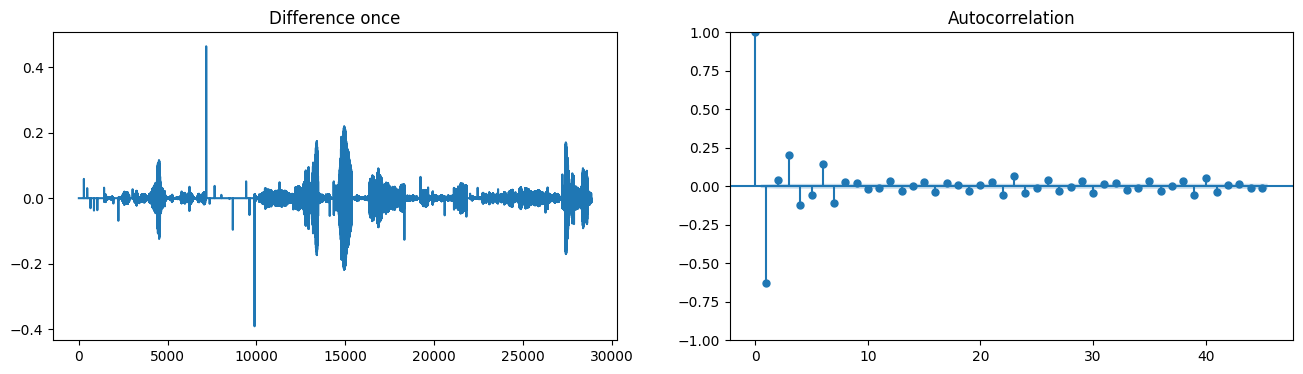

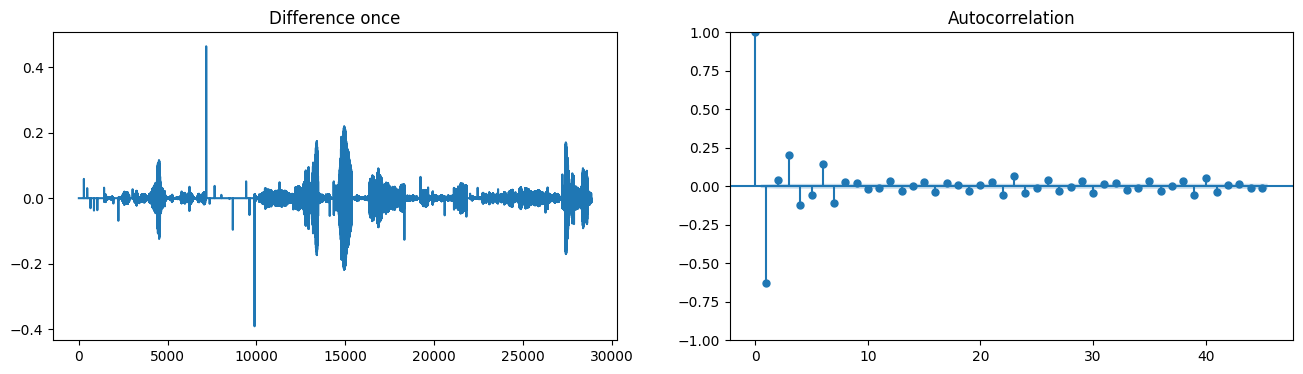

In [ ]:
diff = df.Price.diff().dropna()
print(diff)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
plot_acf(diff, ax=ax2)

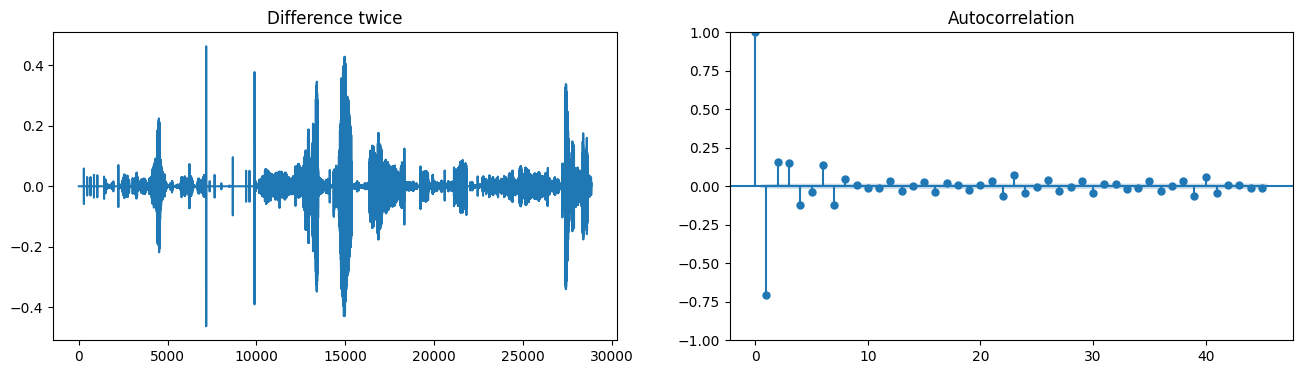

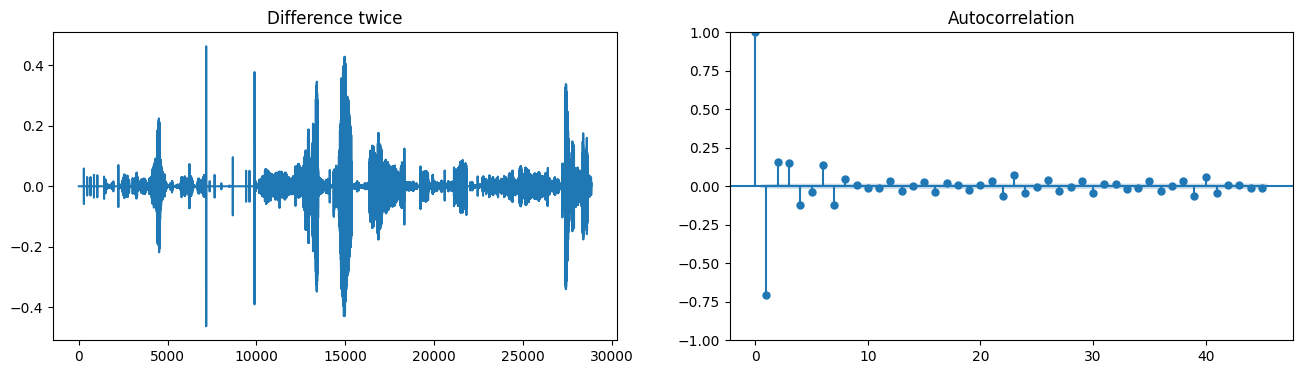

In [ ]:
diff = df.Price.diff().diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference twice")
plot_acf(diff, ax=ax2)

In [ ]:
import pmdarima
from pmdarima.arima.utils import ndiffs

In [ ]:
ndiffs(df.Price, test="adf")

1

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

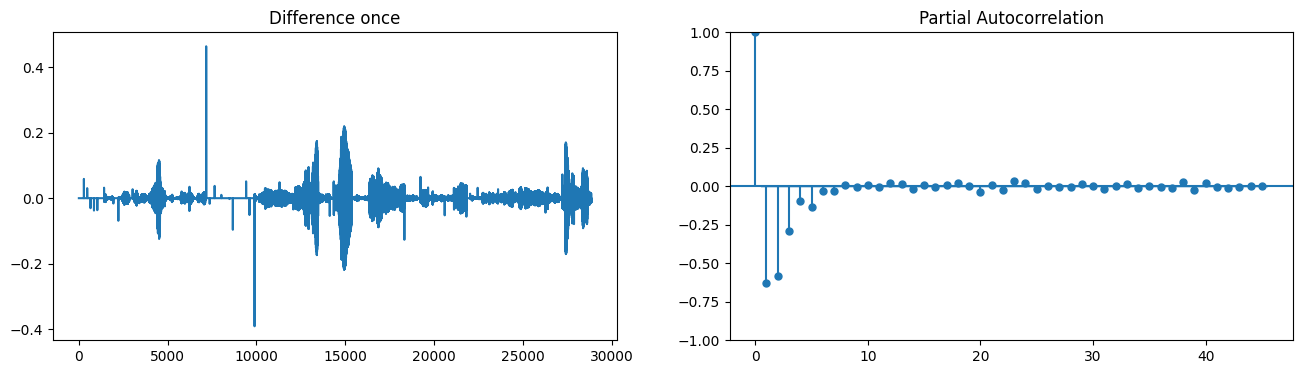

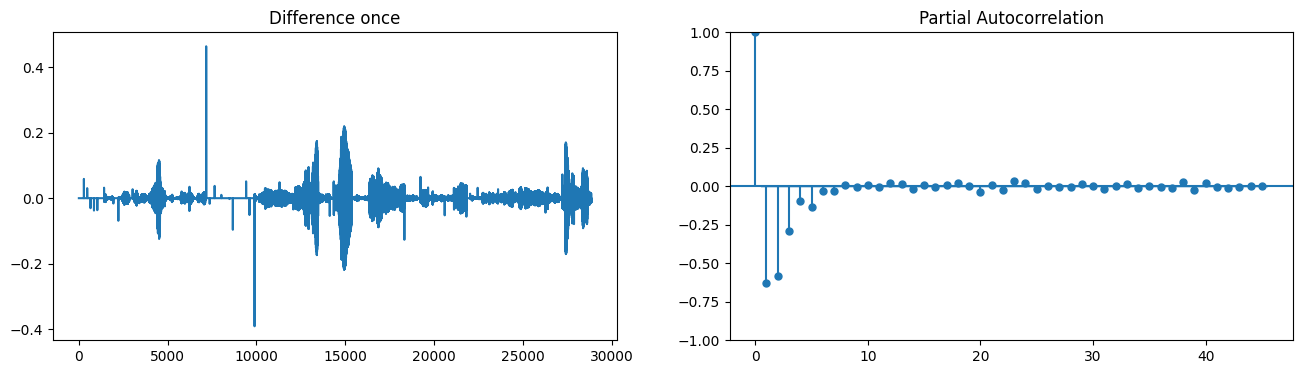

In [ ]:
diff = df.Price.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2)

##Train, Test, Split

In [ ]:
dff = dff[["Price"]]

In [ ]:
dff

,Price
Time,
2021-06-26 22:13:18+00:00,0.2106
2021-06-26 22:13:18+00:00,0.2106
2021-06-26 22:13:18+00:00,0.2106
2021-06-25 22:13:14+00:00,0.2106
2021-06-25 22:13:14+00:00,0.2106
...,...
2021-03-29 17:20:15+00:00,0.1713
2021-03-29 15:51:38+00:00,0.1706
2021-03-29 15:51:38+00:00,0.1577


In [ ]:
n = int(len(df) * 0.8)

In [ ]:
train = dff.Price[:n]
test = dff.Price[n:]
print(f"For Training\n{train}\n")
print(f"For Testing\n{test}")

For Training
Time
2021-06-26 22:13:18+00:00    0.2106
2021-06-26 22:13:18+00:00    0.2106
2021-06-26 22:13:18+00:00    0.2106
2021-06-25 22:13:14+00:00    0.2106
2021-06-25 22:13:14+00:00    0.2106
                              ...  
2021-06-08 06:22:38+00:00    0.1479
2021-06-08 05:32:58+00:00    0.1527
2021-06-07 23:24:03+00:00    0.1483
2021-06-07 22:17:45+00:00    0.1528
2021-06-07 17:30:47+00:00    0.1518
Name: Price, Length: 23073, dtype: float64

For Testing
Time
2021-06-07 15:50:11+00:00    0.1493
2021-06-07 12:13:29+00:00    0.1519
2021-06-07 09:01:17+00:00    0.1495
2021-06-07 06:38:23+00:00    0.1520
2021-06-07 02:44:46+00:00    0.1492
                              ...  
2021-03-29 17:20:15+00:00    0.1713
2021-03-29 15:51:38+00:00    0.1706
2021-03-29 15:51:38+00:00    0.1577
2021-03-29 15:51:38+00:00    0.1569
2021-03-29 14:31:26+00:00    0.1569
Name: Price, Length: 5769, dtype: float64


##Arima Model

The Autoregressive Integrated Moving Average Model (ARIMA) is a modified version of the Autoregressive Moving Average (ARMA) that integrates the AR and MA processes and creates a blended model of the time series. It is a time series model that explains time series based on the observed values and can be used to make predictions. ARIMA models are premised on the basis that a time series future values are created by a linear function of previous observations.
An ARIMA model is represented as ARIMA (p, d, q)(P, D, Q), where (p, d, q) are the nonseasonal components and the (P, D, Q) are the seasonal components. (p, P) is the number of lagged variables, (d, D) is the difference required to keep the time series stationary, and (q, Q) is the moving average over the number of last observations. The time series determines the suitable values for p, d, and q. We utilised Python's auto.arima function to compare and evaluate multiple parameters and choose the one with the lowest forecast error.(Sravan K)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

model = pm.auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-117866.001, Time=29.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-98005.760, Time=5.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-107988.946, Time=4.29 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-115432.278, Time=21.00 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-98007.760, Time=1.00 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-120755.013, Time=55.56 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-118994.746, Time=3.84 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-120730.331, Time=10.30 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-120785.243, Time=13.67 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-119322.144, Time=47.84 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-120765.587, Time=6.33 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-120786.326, Time=27.13 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-119831.711, Time=59.39 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-120783.455,

##SARIMA:
Seasonal ARIMA (SARIMA) enables the ARIMA model to include seasonal elements into data sets, such as the fact that some seasonal trends recur over time. The trend should be configured in three different ways. They're the same from the ARIMA model and go like this:
p: The trend of autoregression's order.
d: The difference in order of the trends.
q: The trend moving averages order.
There are four seasonal components which are not part of ARIMA that should be configured:
P: stands for seasonal autoregressive order
D: Seasonal difference order
Q: the seasonal moving averages' order.
s: The number of time steps in a single seasonal period.


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                23073
Model:               SARIMAX(3, 1, 1)   Log Likelihood               60400.419
Date:                Sat, 11 Nov 2023   AIC                        -120790.838
Time:                        05:56:17   BIC                        -120750.606
Sample:                             0   HQIC                       -120777.766
                              - 23073                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5922      0.005   -118.108      0.000      -0.602      -0.582
ar.L2         -0.3512      0.006    -63.466      0.000      -0.362      -0.340
ar.L3          0.0811      0.004     18.870      0.000       0.073       0.090
ma.L1         -0.5500      0.005   -115.339      0.000      -0.559      -0.541
sigma2         0.0003   5.55e-07    560.929      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          16283104.57
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             1.81
Prob(H) (two-sided):                  0.07   Kurtosis:                       133.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

##**Reflection**:

###**What is the most challenging part of the project that you’ve encountered so far?**
The most challenging part is the collection of data from the AWS API and Parameter Estimation as it is vital since the slightest difference in this can cause drastic differences in the results. Moreover, The preprocessing phase was particularly demanding due to a significant amount of missing data and the need to engineer features that accurately capture the predictive signals for virtual instance performance.

###**What are your initial insights?**
Our initial insights of our data was that the data collected is not stationary, which led us to implement an adfuller test for the data and then we converted it to stationary.
We had plotted a stacked bar plot as it compares 'Zone' and 'Instance Type' and provides valuable insights into the distribution of AWS EC2 instance types across different geographical zones and this helped us to understand the availability and usage patterns of various instance types within each zone.


###**Are there any concrete results you can show at this point? If not, why not?**
As of now we have cleaned the data, performed EDA and also implemented ARIMA and SARIMA for our data set. As we didn’t yet predict the prices using the model,, we don’t have any concrete results yet. But, in the next steps of our project we expect the results of predicted prices from these models which will help us in further exploring more details of the model such as changing the p, d, q values to see if it affects the prediction accuracy. Moreover, we will implement performance metrics such as MAPE, MAE, RMSE, R^2 to know the models accuracy.

Going forward, what are the current biggest problems you’re facing?
One of the main problems we are facing is ensuring that the model remains robust against overfitting while maintaining its predictive power. Another issue is scaling the model to handle larger datasets or adapt to real-time prediction needs. Handling the non-stationarity of data and the computational complexity of optimizing ARIMA and SARIMA model parameters is challenging too. Furthermore, extending the prediction accuracy to other instance types or different cloud providers could present additional challenges.

###**Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?**
Yes, our project is on track and we have been completing each step of the project consistently on time to make sure we complete this project by giving our best. But, we want to concentrate on generalizing the findings across different types of cloud services and to ensure the robustness of the model against data variability.

###**Given your initial exploration of the data, is it worth proceeding with your project, why? If not, how will you move forward (method, data etc)?**
The initial data exploration and analysis performed on the data so far has shown us promising results which suggests us that it is worth proceeding with the project further and implementing the further steps involved in our project.

###**Next Step:**

In the next steps we would like to implement other modes such as LSTM, prophet, Holt–Winters etc. We want to further diversify data by gathering more data and exploring various features of the data as well. In particular, we want to explore various regions, instances and examine the price fluctuations and predictions.



